<p>
    <img src="ayiti_analytics.png" alt="Ayiti Analytics"width=400 />
</p>

# Analysis for the Telco company about their customers who churn

</br>
</br>
<b>The Telco company have many customers whi churn every month, so the executives of the company asked us to conduct an analysis to determine what causes they are losing customers. <i>Their marketing and customer service team</i> are really interested by the output of the analysis. they provided a dataset of 7000 clients</b>

In [27]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
%matplotlib inline

In [30]:
df_Client = pd.read_csv("Telco_Customer_Churn.csv")
df_Client.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Analysis of the dataset

##### Variable Target : Churn

In [157]:
df_Client['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

#### shape of our dataset

In [158]:
df_Client.shape

(7043, 21)

#### Data types of our dataset

In [21]:
df_Client.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Viualisation of the data types of our dataset

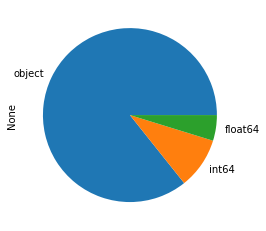

In [15]:
df_Client.dtypes.value_counts().plot.pie()

#### let's convert the dtype of the feature TotalCharges to float

In [122]:
df_Client["TotalCharges"] = pd.to_numeric(df_Client["TotalCharges"],errors='coerce')
df_Client["TotalCharges"].dtype

dtype('float64')

### Analysis of the dataset to identify the missing values

In [26]:
missing_values = df_Client.isnull()
missing_values.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("") 

customerID
False    7043
Name: customerID, dtype: int64

gender
False    7043
Name: gender, dtype: int64

SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

tenure
False    7043
Name: tenure, dtype: int64

PhoneService
False    7043
Name: PhoneService, dtype: int64

MultipleLines
False    7043
Name: MultipleLines, dtype: int64

InternetService
False    7043
Name: InternetService, dtype: int64

OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64

OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64

DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64

TechSupport
False    7043
Name: TechSupport, dtype: int64

StreamingTV
False    7043
Name: StreamingTV, dtype: int64

StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64

Contract
False    7043
Name: Contract, dtype: int64

PaperlessBilling
False    7043
Name: PaperlessBill

#### from the previous command we can see there's no missing values but let's now visualize the missing values if exist

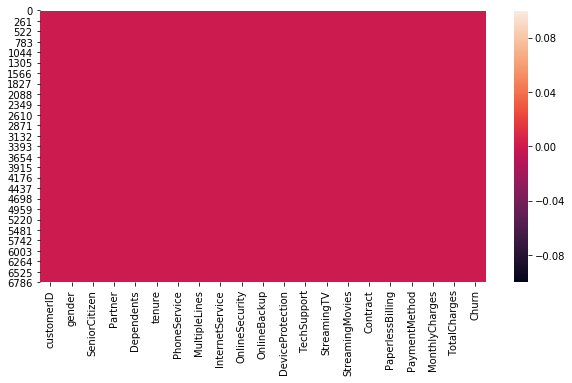

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df_Client.isnull())

#### now we can be sure that the dataset doesn't contain missing values

#### Total of the customers who churn this month

In [6]:
churn_counts = df_Client['Churn'].value_counts().to_frame()
churn_counts.rename(columns={'Churn': 'value_counts'}, inplace=True)
churn_counts.index.name = 'Churn'
churn_counts.head(10)

,value_counts
Churn,
No,5174
Yes,1869


#### In Percent

In [27]:
df_Client['Churn'].value_counts(normalize="True")

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

#### 1869 customers churn this month which represents 26,54% of the dataset

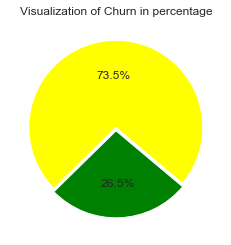

In [250]:
size = df_Client["Churn"].value_counts(sort=True)
color =["yellow","green"]
explode=(0.02,0.02)
plt.pie(size,colors=color, explode=explode,autopct='%1.1f%%',startangle=320)
plt.title("Visualization of Churn in percentage")
plt.show()

## what impact the churn has on the Company?

<b>we saw above how many customers left the company, let's now see how much money the company lost</b>

In [254]:
df_churn = df_Client[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum().to_frame().reset_index()
df_churn

,Churn,MonthlyCharges
0,No,316985.75
1,Yes,139130.85


#### In percentage

In [259]:
df_churn = df_Client[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum().to_frame()/df_Client['MonthlyCharges'].sum()
df_churn

,MonthlyCharges
Churn,
No,0.694966
Yes,0.305034


##### the company has lost 139.130,85$ which represents 31% of their monthly charges.

<b>Now that we have determined how many churn the company and its impact. Now we are going to explain churn by some features of our dataset</b>


<b>Explain churn by the below categories:</b>
<ol><li> Customer demographics like age and gender</li>
    <li>Services used</li>
    <li> Billing information</li>
</ol>

#### Churn explain by Customer demographic

In [123]:
demographic = df_Client[["gender","SeniorCitizen","Partner","Dependents","Churn"]]
demographic

,gender,SeniorCitizen,Partner,Dependents,Churn
0,Female,0,Yes,No,No
1,Male,0,No,No,No
2,Male,0,No,No,Yes
3,Male,0,No,No,No
4,Female,0,No,No,Yes
...,...,...,...,...,...
7038,Male,0,Yes,Yes,No
7039,Female,0,Yes,Yes,No
7040,Female,0,Yes,Yes,No
7041,Male,1,Yes,No,Yes


In [125]:
demographic[["gender","SeniorCitizen","Partner","Dependents","Churn"]].groupby(["gender","SeniorCitizen","Partner","Dependents","Churn"]).size().to_frame().rename(columns ={0:"count"}).reset_index()

,gender,SeniorCitizen,Partner,Dependents,Churn,count
0,Female,0,No,No,No,909
1,Female,0,No,No,Yes,429
2,Female,0,No,Yes,No,110
3,Female,0,No,Yes,Yes,32
4,Female,0,Yes,No,No,482
5,Female,0,Yes,No,Yes,114
6,Female,0,Yes,Yes,No,720
7,Female,0,Yes,Yes,Yes,124
8,Female,1,No,No,No,159
9,Female,1,No,No,Yes,158


Text(0.5, 1.0, 'Dependents')

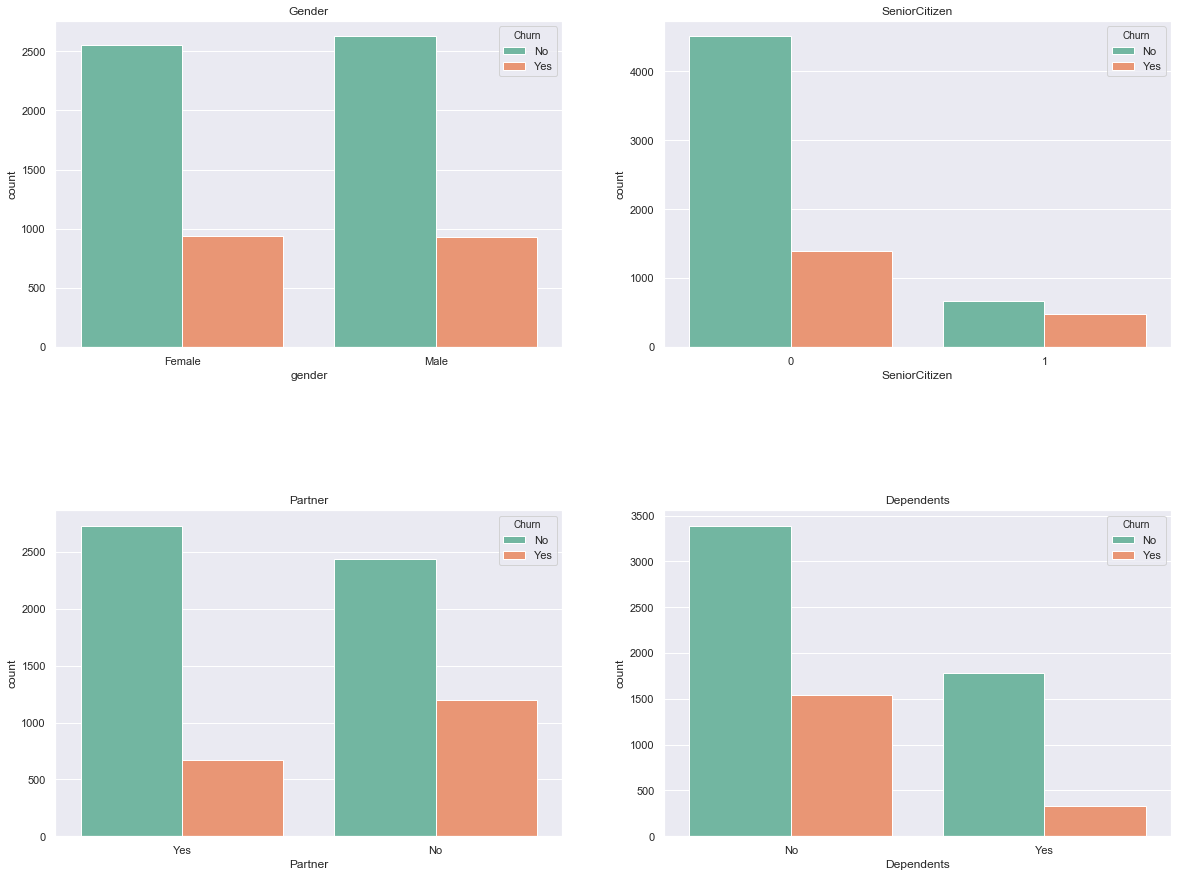

In [216]:
fig,axes =plt.subplots(2,2,figsize =(20,15))
plt.subplots_adjust(hspace = 0.5)
sns.set(style="darkgrid")
ax1 = sns.countplot(x="gender", data=demographic,palette="Set2", hue="Churn" ,ax=axes[0,0])
ax2  = sns.countplot(x="SeniorCitizen" , data=demographic,palette="Set2", hue="Churn", ax=axes[0,1])
ax3  = sns.countplot(x="Partner" , data=demographic,palette="Set2", hue="Churn",ax=axes[1,0])
ax4  = sns.countplot(x="Dependents" , data=demographic,palette="Set2", hue="Churn",ax=axes[1,1])

ax1.set_title("Gender")
ax2.set_title("SeniorCitizen")
ax3.set_title("Partner")
ax4.set_title("Dependents")


<b>by the charts above we can see that gender hasn't an impact on churn but we can notice that customers who are not SeniorCitizen churn more than the others. the third figure shows that customers without partner tend to churn the most and about the last figure we can say that customers without dependents churn.</b>

#### Churn explain by Service Used

In [81]:
ServiceUsed = df_Client[["PhoneService","MultipleLines","InternetService","OnlineSecurity","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Churn"]]
ServiceUsed

,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,0,1,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0,0
2,1,0,1,1,0,0,0,0,1
3,0,0,1,1,1,1,0,0,0
4,1,0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,1,1,1,0
7039,1,1,2,0,1,0,1,1,0
7040,0,0,1,1,0,0,0,0,0
7041,1,1,2,0,0,0,0,0,1


Text(0.5, 1.0, 'StreamingMovies')

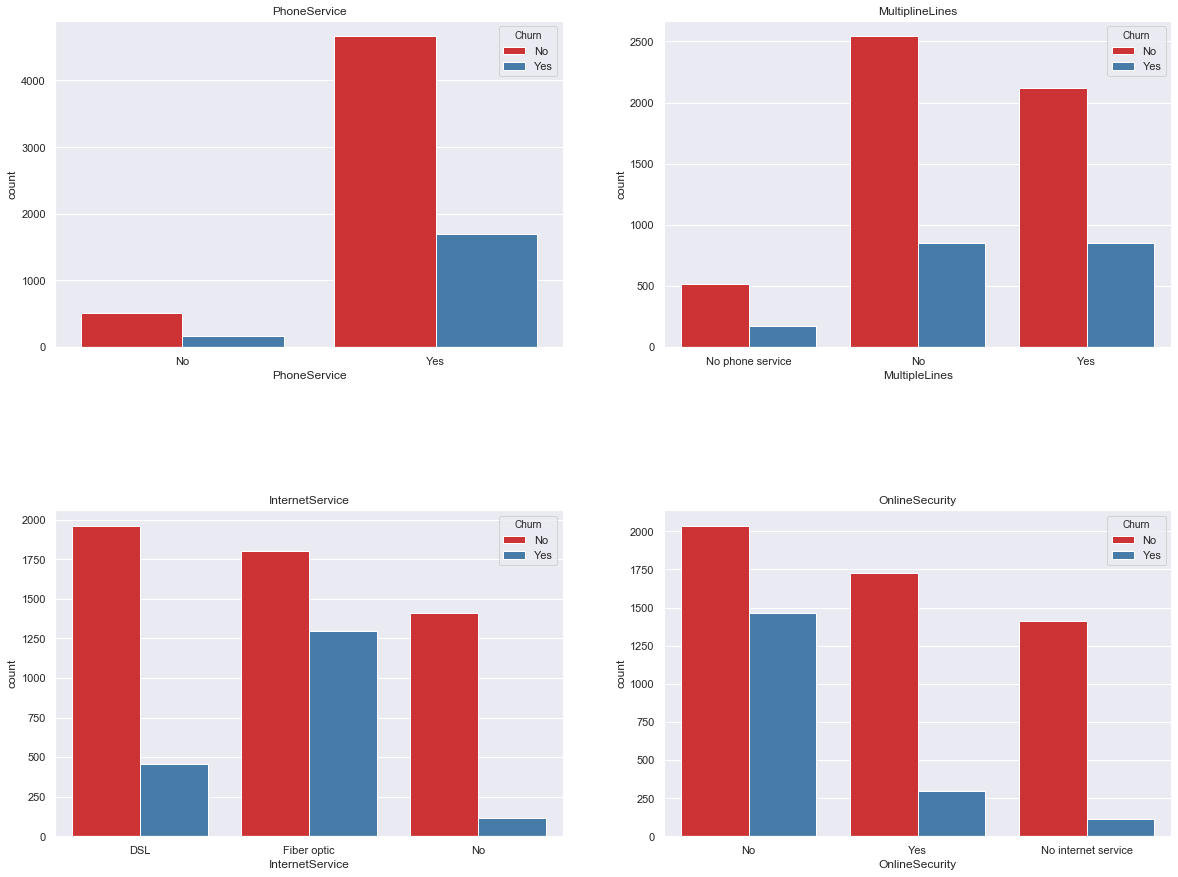

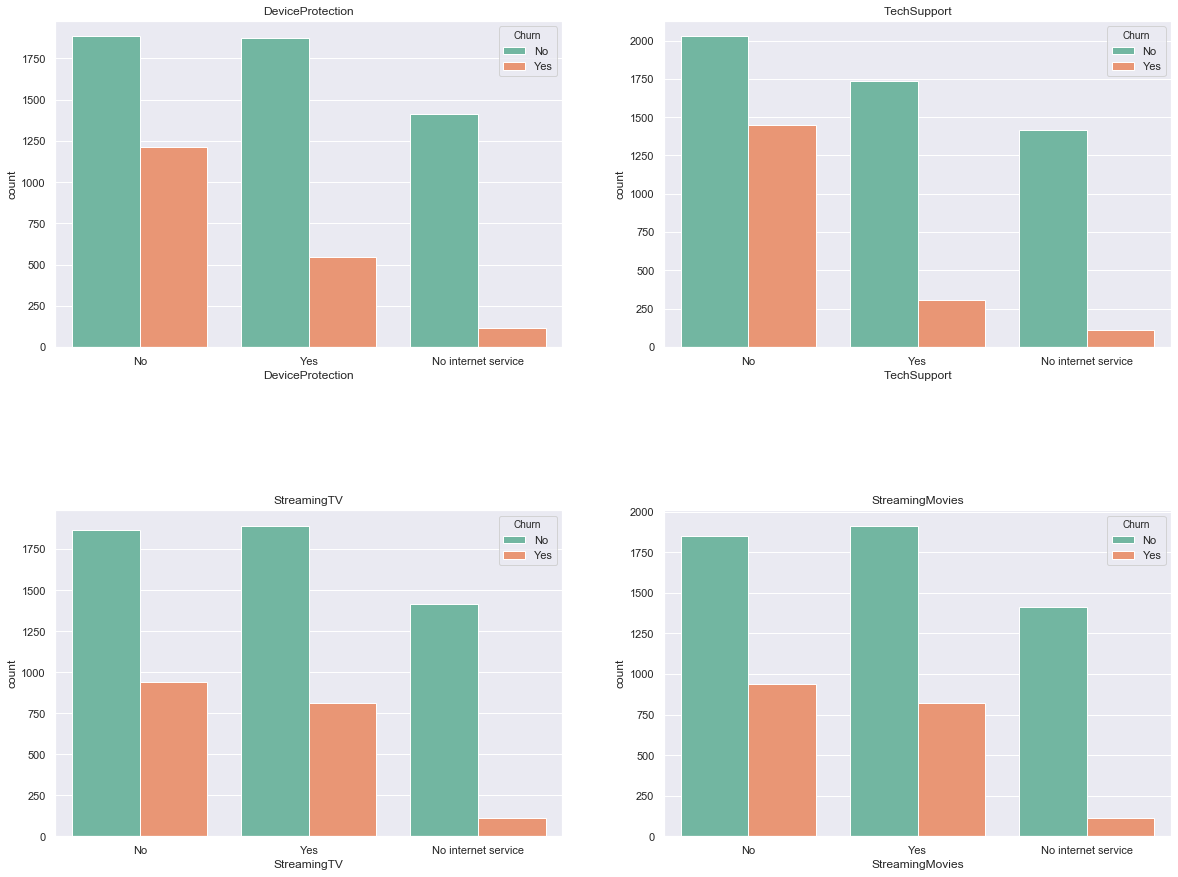

In [17]:
fig,axes =plt.subplots(2,2,figsize =(20,15))
plt.subplots_adjust(hspace = 0.5)
sns.set(style="darkgrid")
ax5 = sns.countplot(x="PhoneService", data=ServiceUsed,palette="Set1",hue ="Churn" ,ax=axes[0,0])
ax5.set_title("PhoneService")

ax6  = sns.countplot(x="MultipleLines" , data=ServiceUsed,palette="Set1",hue ="Churn" ,ax=axes[0,1])
ax6.set_title("MultiplineLines")

ax7  = sns.countplot(x="InternetService" , data=ServiceUsed,palette="Set1",hue ="Churn" ,ax=axes[1,0])
ax7.set_title("InternetService")

ax8  = sns.countplot(x="OnlineSecurity" , data=ServiceUsed,palette="Set1",hue ="Churn" ,ax=axes[1,1])
ax8.set_title("OnlineSecurity")

fig,axes =plt.subplots(2,2,figsize =(20,15))
plt.subplots_adjust(hspace = 0.5)
sns.set(style="darkgrid")
ax9  = sns.countplot(x="DeviceProtection" , data=ServiceUsed,palette="Set2",hue ="Churn" ,ax=axes[0,0])
ax9.set_title("DeviceProtection")

ax10  = sns.countplot(x="TechSupport" , data=ServiceUsed,palette="Set2",hue ="Churn" ,ax=axes[0,1])
ax10.set_title("TechSupport")

ax11  = sns.countplot(x="StreamingTV" , data=ServiceUsed,palette="Set2",hue="Churn" ,ax=axes[1,0])
ax11.set_title("StreamingTV")

ax12  = sns.countplot(x="StreamingMovies" , data=ServiceUsed,palette="Set2", hue ="Churn" ,ax=axes[1,1])
ax12.set_title("StreamingMovies")



#### Churn explain by Billing Information

In [151]:
billing_information = df_Client[["Contract","PaperlessBilling","PaymentMethod","Churn"]]
billing_information

,Contract,PaperlessBilling,PaymentMethod,Churn
0,Month-to-month,Yes,Electronic check,No
1,One year,No,Mailed check,No
2,Month-to-month,Yes,Mailed check,Yes
3,One year,No,Bank transfer (automatic),No
4,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...
7038,One year,Yes,Mailed check,No
7039,One year,Yes,Credit card (automatic),No
7040,Month-to-month,Yes,Electronic check,No
7041,Month-to-month,Yes,Mailed check,Yes


In [152]:
billing_information[["Contract","PaperlessBilling","PaymentMethod","Churn"]].groupby(["Contract","PaperlessBilling","PaymentMethod","Churn"]).size().to_frame().rename(columns ={0:"count"}).reset_index()

,Contract,PaperlessBilling,PaymentMethod,Churn,count
0,Month-to-month,No,Bank transfer (automatic),No,151
1,Month-to-month,No,Bank transfer (automatic),Yes,55
2,Month-to-month,No,Credit card (automatic),No,116
3,Month-to-month,No,Credit card (automatic),Yes,45
4,Month-to-month,No,Electronic check,No,265
5,Month-to-month,No,Electronic check,Yes,188
6,Month-to-month,No,Mailed check,No,351
7,Month-to-month,No,Mailed check,Yes,118
8,Month-to-month,Yes,Bank transfer (automatic),No,237
9,Month-to-month,Yes,Bank transfer (automatic),Yes,146


Text(0.5, 1.0, 'PaymentMethod')

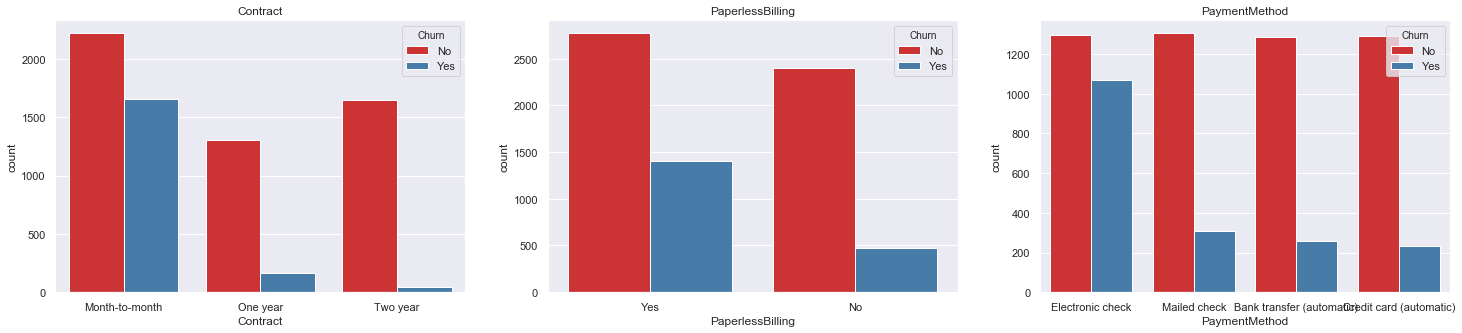

In [191]:
fig,axes =plt.subplots(1,3,figsize =(25,5))
plt.subplots_adjust(wspace = 0.2)
sns.set(style="darkgrid")
ax1 = sns.countplot(x="Contract", data=billing_information,palette="Set1", hue="Churn" ,ax=axes[0])
ax2  = sns.countplot(x="PaperlessBilling", data=billing_information,palette="Set1", hue="Churn", ax=axes[1])
ax3  = sns.countplot(x="PaymentMethod", data=billing_information,palette="Set1", hue="Churn",ax=axes[2])

ax1.set_title("Contract")
ax2.set_title("PaperlessBilling")
ax3.set_title("PaymentMethod")

<b> the figures obtained with Billing Information let us to say that Customer with a month-to-month contract, Customers who are paperlessbilling and those who pay by electronic Check are those who churn. </b>

### What services are typically purchased by customers who churned? 
### Are Any services especially helpful in retaining customers?

Text(0.5, 1.0, 'StreamingTV')

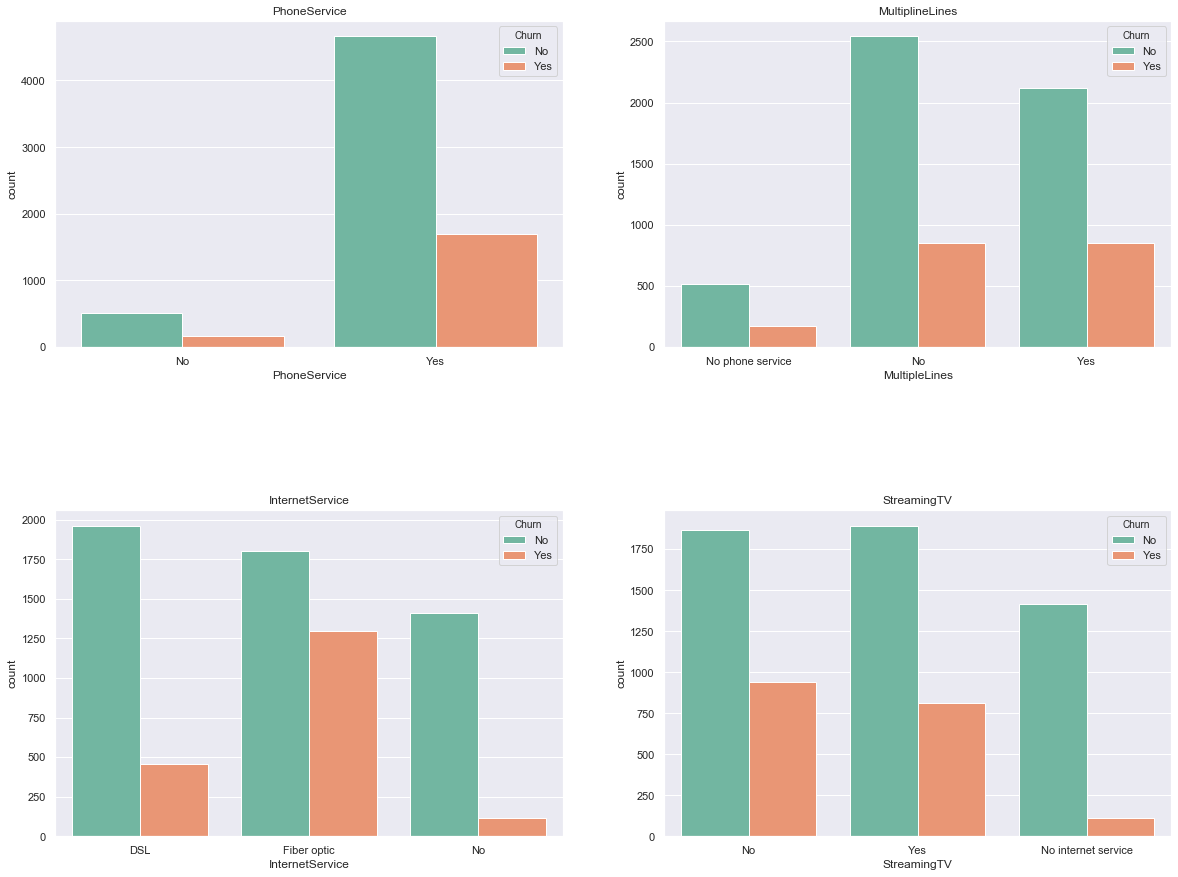

In [15]:
fig,axes =plt.subplots(2,2,figsize =(20,15))
plt.subplots_adjust(hspace = 0.5)
sns.set(style="darkgrid")
ax13 = sns.countplot(x="PhoneService", data=ServiceUsed,palette="Set2",hue ="Churn" ,ax=axes[0,0])
ax13.set_title("PhoneService")

ax14  = sns.countplot(x="MultipleLines" , data=ServiceUsed,palette="Set2",hue ="Churn" ,ax=axes[0,1])
ax14.set_title("MultiplineLines")

ax15  = sns.countplot(x="InternetService" , data=ServiceUsed,palette="Set2",hue ="Churn" ,ax=axes[1,0])
ax15.set_title("InternetService")

ax16  = sns.countplot(x="StreamingTV" , data=ServiceUsed,palette="Set2",hue ="Churn" ,ax=axes[1,1])
ax16.set_title("StreamingTV")

<b>Phone service,Multiple Lines, Fiber optic as Internet service and Streaming TV. These services are typically used by Churned customers<b>

Text(0.5, 1.0, 'StreamingMovies')

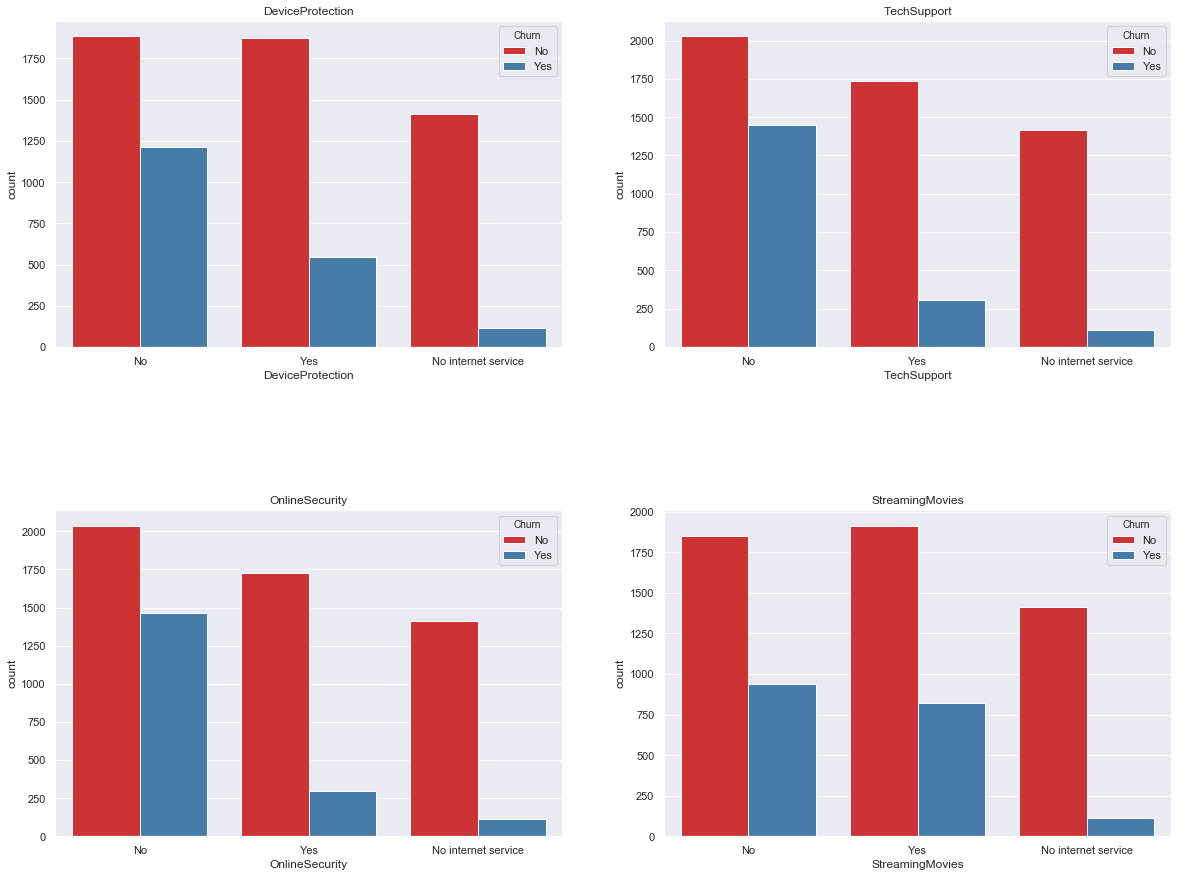

In [19]:
fig,axes =plt.subplots(2,2,figsize =(20,15))
plt.subplots_adjust(hspace = 0.5)
sns.set(style="darkgrid")
ax9  = sns.countplot(x="DeviceProtection" , data=ServiceUsed,palette="Set1",hue ="Churn" ,ax=axes[0,0])
ax9.set_title("DeviceProtection")

ax10  = sns.countplot(x="TechSupport" , data=ServiceUsed,palette="Set1",hue ="Churn" ,ax=axes[0,1])
ax10.set_title("TechSupport")

ax8  = sns.countplot(x="OnlineSecurity" , data=ServiceUsed,palette="Set1",hue ="Churn" ,ax=axes[1,0])
ax8.set_title("OnlineSecurity")

ax12  = sns.countplot(x="StreamingMovies" , data=ServiceUsed,palette="Set1", hue ="Churn" ,ax=axes[1,1])
ax12.set_title("StreamingMovies")


<b>the services like tech support, Online Security, Streaming movies, device protection tend to be the best services that might be helpful in retaining customers</b>

### Let turn our categorical values into numerical values in order to use our dataset for the classifier

In [36]:
cat_val = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for col in cat_val:
    print(col,df_Client[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [37]:
cat_val0 = ['gender']

def clean(data):
    rep = data.replace('Female', '1')
    rep = rep.replace('Male', '0')
    return rep

df_Client[cat_val0] = df_Client[cat_val0].applymap(clean)

In [38]:
cat_val1 = ['MultipleLines']

def clean1(data):
    rep = data.replace('No phone service', 'No')
    return rep

df_Client[cat_val1] = df_Client[cat_val1].applymap(clean1)

In [39]:
cat_val2 = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

def clean2(data):
    rep = data.replace('No internet service', 'No')
    return rep

df_Client[cat_val2] = df_Client[cat_val2].applymap(clean2)

In [40]:
cat_val3 = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
def clean_up(data):
    rep = data.replace('No','0')
    rep = rep.replace('Yes','1')
    return rep

df_Client[cat_val3] = df_Client[cat_val3].applymap(clean_up)

In [41]:
cat_val2_ = ['OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

def clean2_(data):
    rep = data.replace('0 service', '0')
    return rep

df_Client[cat_val2_] = df_Client[cat_val2_].applymap(clean2_)

In [42]:
cat_val4 = ['InternetService']
def clean4(data):
    rep = data.replace('No','0')
    rep = rep.replace('DSL','1')
    rep = rep.replace('Fiber optic','2')
    return rep

df_Client[cat_val4] = df_Client[cat_val4].applymap(clean4)

In [43]:
cat_val5 = ['Contract']
def clean5(data):
    rep = data.replace('Month-to-month','1')
    rep = rep.replace('One year','2')
    rep = rep.replace('Two year','3')
    return rep

df_Client[cat_val5] = df_Client[cat_val5].applymap(clean5)

In [44]:
cat_val6 = ['PaymentMethod']
def clean6(data):
    rep = data.replace('Electronic check','1')
    rep = rep.replace('Mailed check','2')
    rep = rep.replace('Bank transfer (automatic)','3')
    rep = rep.replace('Credit card (automatic)','4')
    return rep

df_Client[cat_val6] = df_Client[cat_val6].applymap(clean6)

In [45]:
cat_val_ = ['OnlineBackup']

def clean_(data):
    rep = data.replace('0 internet service', '0')
    return rep

df_Client[cat_val_] = df_Client[cat_val_].applymap(clean_)

In [46]:
cat_val = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','Churn','PaymentMethod']
for col in cat_val:
    print(col,df_Client[col].unique())

gender ['1' '0']
Partner ['1' '0']
Dependents ['0' '1']
PhoneService ['0' '1']
MultipleLines ['0' '1']
InternetService ['1' '2' '0']
OnlineSecurity ['0' '1']
OnlineBackup ['1' '0']
DeviceProtection ['0' '1']
TechSupport ['0' '1']
StreamingTV ['0' '1']
StreamingMovies ['0' '1']
Contract ['1' '2' '3']
PaperlessBilling ['1' '0']
Churn ['0' '1']
PaymentMethod ['1' '2' '3' '4']


In [47]:
df_Client.drop(columns=['customerID'], inplace = True)

In [48]:
df_Client.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,2,56.95,1889.5,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,2,0,3,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,1,70.70,151.65,1


In [49]:
for column in df_Client:
    df_Client[column] = pd.to_numeric(df_Client[column],errors='coerce')

In [50]:
df_Client.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

#### Now after turning our categorical values into numeric ones we have a dataset that can be used for prediction

### Let's see if there is any strong correlation between the variables

In [137]:
df_Client.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.008414,0.010380,0.017021,0.013773,0.002105,0.009212,0.008393,0.010487,-0.000126,0.011754,0.005209,0.014569,-0.000048,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.102411,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.133115,0.096848,0.319072,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.123844,-0.113890,0.064653,-0.164221
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.033230,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,0.825880,-0.352229
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004070,0.247398,0.113008,0.011942
MultipleLines,0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.035851,0.490434,0.469042,0.040102
InternetService,0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.178137,0.905491,0.428212,0.316846
OnlineSecurity,0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,0.412619,-0.171226
OnlineBackup,0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,0.510100,-0.082255


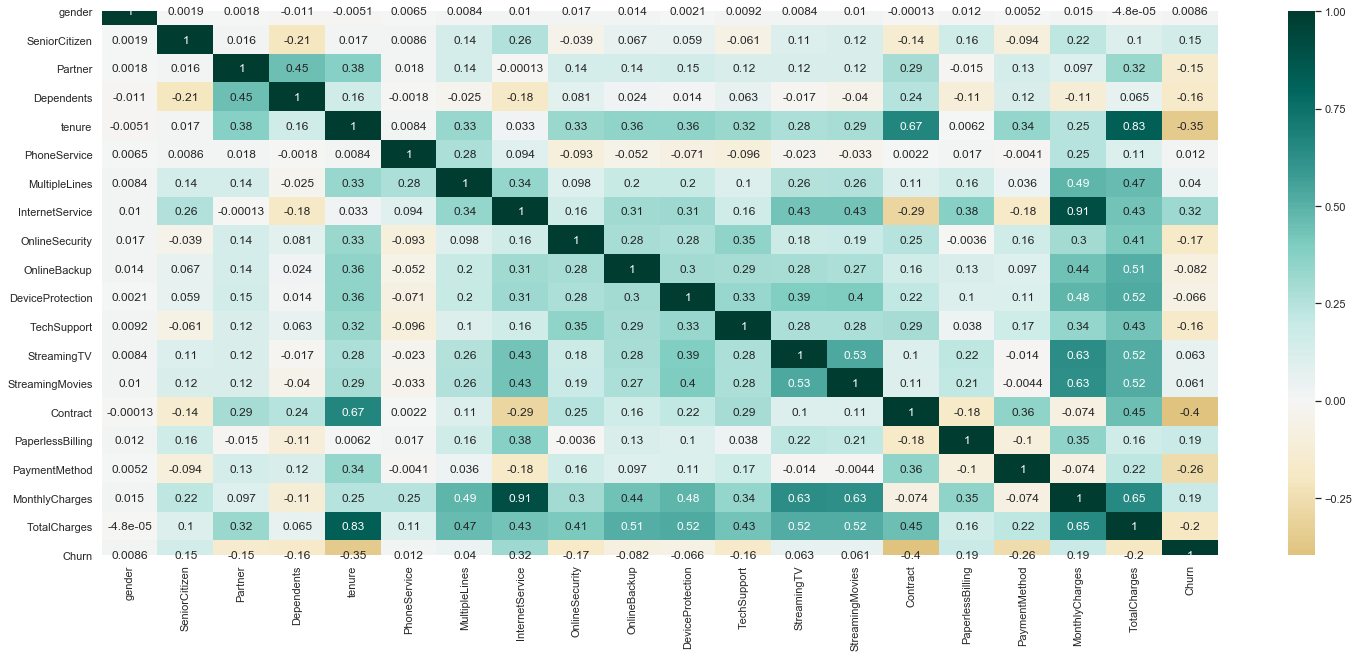

In [144]:
figure, ax = plt.subplots( figsize =(25,10))
sns.heatmap (df_Client.corr(), center = 0, cmap ='BrBG', annot = True)

<b>From the table and the heatmap above, we notice there is a big correlation between TotalCharges and Tenure 
which is correct because the longer someone is with the company the higher the TotalCharges will be. And also 
there's a big correlation between the columns MonthlyCharges and Internet Service.</b>

### Now let's split the dataset so we can have our training and testing part in order to build the model we want.

<b>let's first write a function to clean our dataset if there's any Nan or Infinity values</b>

In [51]:

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [52]:
clean_dataset(df_Client)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,29.85,29.85,0.0
1,0.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,56.95,1889.50,0.0
2,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,53.85,108.15,1.0
3,0.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,3.0,42.30,1840.75,0.0
4,1.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,84.80,1990.50,0.0
7039,1.0,0.0,1.0,1.0,72.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,4.0,103.20,7362.90,0.0
7040,1.0,0.0,1.0,1.0,11.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,29.60,346.45,0.0
7041,0.0,1.0,1.0,0.0,4.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,74.40,306.60,1.0


<b> Dataset cleaned, 11 rows are dropped </b>

<b> let's split the dataset, X will store the independents variables while y will keep the dependent one </b>

In [53]:
X = df_Client.drop(columns=['Churn'])
y = df_Client['Churn']

<b> training the model </b>

In [54]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4922, 19) (4922,)
Test set: (2110, 19) (2110,)


<b> Putting our datasets on the same scale</b>

In [55]:
sc = StandardScaler()
X_train = sc.fit_transform (X_train)
X_test = sc.transform (X_test)
X_test

array([[-0.99392338, -0.43362195, -0.96564464, ..., -1.13494209,
        -1.47409441, -0.99678627],
       [-0.99392338, -0.43362195, -0.96564464, ...,  1.46529917,
        -1.47576141, -0.86022192],
       [ 1.00611377, -0.43362195, -0.96564464, ...,  1.46529917,
        -1.5024333 , -0.9971612 ],
       ...,
       [-0.99392338,  2.3061563 ,  1.03557764, ...,  0.59855208,
         0.55797071,  0.23590985],
       [ 1.00611377, -0.43362195,  1.03557764, ...,  0.59855208,
        -1.38574376, -0.28992463],
       [ 1.00611377, -0.43362195,  1.03557764, ...,  0.59855208,
        -1.48576337, -0.4341641 ]])

<b> Let's build our model using a classification method such as Logistic Regression</b>

In [56]:
classifier = LogisticRegression (random_state = 0, solver ="liblinear")
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction

In [57]:
y_predict = classifier.predict(X_test)

### Evaluation

In [58]:
df_predict = pd.DataFrame({'y_predict': y_predict[:]})
df_predict.head()

,y_predict
0,0
1,0
2,0
3,1
4,1


In [63]:
df_y_test = pd.DataFrame({'y_test': y_test[:]})
df_y_test.head()

,y_test
5561,0
5814,0
2645,0
3983,1
6438,1


### let's compare our prediction to our test set

In [64]:
val= dict(predict =list(df_predict.y_predict),test=list(df_y_test.y_test))

In [103]:
df = pd.DataFrame(val)
df.head()

,predict,test
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1


<b>Evaluation of the model using Jaccard Index</b>

In [224]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_predict)

C:\Users\jake brown\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8004739336492891

<b>Using Jaccard Index our model is accurate at 80% </b>

## Customer Profile

#### let' s split the dataset between the clients who churned and those who didn't

In [76]:
churn_yes = df_Client[df_Client["Churn"] == 1]
churn_no = df_Client[df_Client["Churn"] == 0]

In [257]:
churn_yes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,53.85,108.15,1
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,1,70.70,151.65,1
5,1,0,0,0,8,1,1,2,0,0,1,0,1,1,1,1,1,99.65,820.50,1
8,1,0,1,0,28,1,1,2,0,0,1,1,1,1,1,1,1,104.80,3046.05,1
13,0,0,0,0,49,1,1,2,0,1,1,0,1,1,1,1,3,103.70,5036.30,1


In [394]:
churn_yes[churn_yes.gender == 0].groupby(['gender','SeniorCitizen']).size().to_frame().rename(columns={0:'count'}).apply(lambda r : r/r.sum())

count
gender SeniorCitizen          
0      0              0.746237
       1              0.253763

In [395]:
churn_yes[churn_yes.gender == 0].groupby(['gender','PhoneService']).size().to_frame().rename(columns={0:'count'}).apply(lambda r : r/r.sum())

count
gender PhoneService          
0      0             0.096774
       1             0.903226

In [396]:
churn_yes[churn_yes.gender == 1].groupby(['gender','SeniorCitizen']).size().to_frame().rename(columns={0:'count'}).apply(lambda r : r/r.sum())

count
gender SeniorCitizen          
1      0              0.744409
       1              0.255591

In [ ]:
churn_yes[churn_yes.gender == 1].groupby(['gender','SeniorCitizen']).size().to_frame().rename(columns={0:'count'}).apply(lambda r : r/r.sum())

In [3]:
female =dict(theta=['PhoneService_yes','PhoneService_no','SeniorCitizen_yes','SeniorCitizen_no'],r=[0.255591,0.744409,0.255591,0.744409])
df_female = pd.DataFrame(female)
df_female

,theta,r
0,PhoneService_yes,0.255591
1,PhoneService_no,0.744409
2,SeniorCitizen_yes,0.255591
3,SeniorCitizen_no,0.744409


In [5]:
df_Client1 = pd.read_csv("Telco_Customer_Churn.csv")
df_Client1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_Client_cpy = df_Client1.copy()
df_Client_cpy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
col = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService']

df1 = pd.get_dummies(df_Client_cpy[col])

In [11]:
df1['gender'] = df_Client_cpy['gender']
df1['Churn'] = df_Client_cpy['Churn']

In [18]:
df1 =df1.groupby(['Churn','gender']).sum()
columns = list(df1.columns)
df1 =df1.reset_index()
df2 =df1[df1.Churn == 'Yes']
df2

,Churn,gender,SeniorCitizen,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
2,Yes,Female,240,620.0,319.0,774.0,165.0,80.0,859.0,443.0,80.0,416.0,219.0,664.0,56.0
3,Yes,Male,236,580.0,350.0,769.0,161.0,90.0,840.0,406.0,90.0,434.0,240.0,633.0,57.0


In [22]:
values = list(df2[df2.gender =='Female'][columns].values[0])
values
    

[240.0,
 620.0,
 319.0,
 774.0,
 165.0,
 80.0,
 859.0,
 443.0,
 80.0,
 416.0,
 219.0,
 664.0,
 56.0]

In [23]:
import plotly.express as px
import pandas as pd

fig = px.line_polar(df2, r=values, theta=columns, line_close=True)
fig.show()

#### This radar chart above is a customer profile according to the gender women

In [67]:
values_ = list(df2[df2.gender =='Male'][columns].values[0])

In [68]:
import plotly.express as px
import pandas as pd

fig = px.line_polar(df2, r=values_, theta=columns, line_close=True)
fig.show()

#### This radar chart above is a customer profile according to the gender women

## BONUS

<b>Knowing that the company cannot have new customers how long it will take to lose all the customers and which demographics will they lose first.</b>

<b> To calculate how long it will take for the company to lose all the customers we used sympy and library from python.</b>
</br>
#### quick explanation of the library sympy
<b>SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.</b>

In [71]:
from sympy.solvers import solve
from sympy import symbols, Eq, solve

In [69]:
Churn_rate = 0.2654
population = 5163
end_population = 0

In [72]:
x = symbols('x')

In [73]:
fx_population = Eq(population*(1-Churn_rate)**x)
sol = solve(fx_population,x)
sol

[]

In [74]:
curr_pop = 5163
day_from_start = 0
while curr_pop>=1:
    curr_pop = curr_pop - (curr_pop*(Churn_rate))
    day_from_start +=1
print (day_from_start)

28


<p style = text-align:right></br></br><font face="tahoma"><b><i><small>@presented by Max-Havel JACOB</small></i></b></font></p>